# Task #

# Introduction #

I will be analysing data from a molecular dynamics simulation, which is a computational calculation of how a system of atoms or molecules change over time, using Newton's second law to calculate the forces of every atom on each atom.

The diffusion of sodium ions through glass, is the simluation being analysed today. Ions, atoms, or molecules move through a substance by constantly colliding and rebounding off the other atoms on its path, and not in a straight line. The path of a single ion through glass is completely random, which is very similar to Brownian motion. In Albert Einstein's PhD thesis, he showed that the mean square displacement is directly proportional to the elapsed time:
                                                   $$ MSD=⟨r^2⟩=6Dt+c $$                                                    

The constant term of the equation, $ D $, is the diffusion coefficient and is very important, as it tells us more about the mobility of ions in this specific glass. The equation above for the mean square displacement is in the form:
$$ y=mx+c $$
 
Knowing this, the diffusion coefficient can be calculated from the slope, $ m $:
$$ D= \frac{m}{6} $$

# Objective #

* I will start by importing code from last session for x-ray diffraction plot and then plotting the data file provided, "Session5data.csv". Data will be plotted as points, with no lines to join them. Graph will be customised to have appropriate heading and axis labels.

* Text cells will be used to explain the process which I use to complete the task, in addition to "#" code comments alongside the code.

*  The slope and intercept of the least squares fit will be calculated with the equations below:

$$ m = \frac{\sum(x_i - \bar{x}) y_i}{\sum (x_i - \bar{x})^2} = \frac{\sum x_i (y_i - \bar{y})}{\sum x_i (x_i - \bar{x})}; $$

$$ c = \bar{y} - m \bar{x} $$

* Uncertainties, for the slope and intercept, will be calculated and outputted.

* All required calculated values will be outputted in their full form within complete sentences, including correct units for the values. These values include the slope and intercept, with uncertainties and units.

* On the same plot as data points, the fitted straight line will be plotted.

* To  an appropriate number of significant figures, calculated values for the slope, intercept and the corresponding uncertainties will be outputted.

* Then the diffusion coefficient $ D $ and its uncertainty for Na+ ions in the glass will be calculated and outputted.

# Importing Data #

In [1]:
import numpy as np              #This imports the nunmpy package as "np"
import matplotlib.pyplot as plt #This imports the graph plotting package
%matplotlib notebook
time, msd = np.loadtxt("Session5data.csv", skiprows=0, unpack=True, delimiter=',') #This loads the file as an array
print("Simulation Times (Picoseconds): ", time)             #Prints the array corresponding to the data within the first column
print("Mean Square Displacement (10^(-20) m^2): ", msd)     #Prints the array corresponding to the data within the second column

Simulation Times (Picoseconds):  [ 30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.]
Mean Square Displacement (10^(-20) m^2):  [ 66.97733153  69.00393687  71.02691592  73.04670438  75.06715793
  77.08458775  79.10092977  81.11463975  83.12702433  85.13417612
  87.1357832 ]


In the above code cell, I have simply imported both the "numpy", which contains many mathematical functions, and "mathplotlib.pyplot", which allows plots to be easily created with Python. As in the previous task, I imported the csv file, unpacking it into a separate array for each column. The two arrays have also been given appropriate, short names.

# Plotting Data and Calculations #

<IPython.core.display.Javascript object>


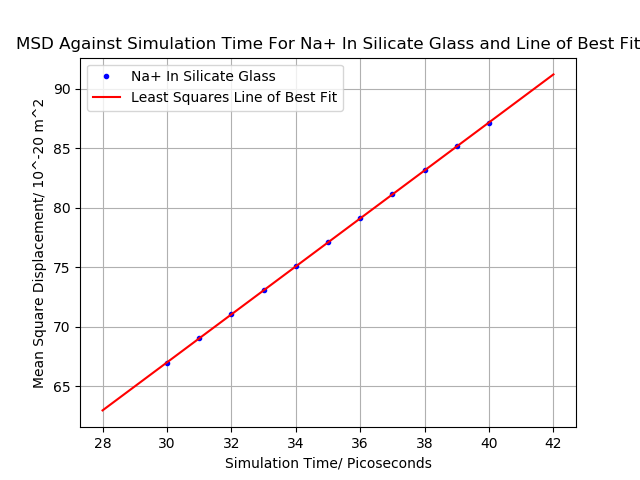

Mean of x is 35.0 picoseconds
Mean of y is 77.0744715955 x10^-20 m^2
The slope is 2.016210756 x10^-8 m^2s^-1
The intercept is 6.50709513545 x10^-20 m^2
The uncertainty in the slope is 0.00105026603643 x10^-8 m^2s^-1
The uncertainty in the intercept is 0.0369090443237 x10^-20 m^2

Mean of x is 35.000 picoseconds to 3dp.
Mean of y is 77.074 x10^-20 m^2 to 3dp.
The slope is 2.016 x10^-8 m^2s^-1 to 3dp.
The intercept is 6.51 x10^-20 m^2 to 2dp.
The uncertainty in the slope is 0.001 x10^-8 m^2s^-1 to 3dp.
The uncertainty in the intercept is 0.04 x10^-20 m^2 to 2dp.

Slope = (2.016 ± 0.001)x10^-8 m^2s^-1
Intercept = (6.51 ± 0.04)x10^-20 m^2


In [2]:
plt.figure() #Starts a new figure
plt.grid(True) #Creates a grid within the plot
plt.plot(time,msd, 'b.', label="Na+ In Silicate Glass") #Plots the data for diffusion of Na+ ions as blue dots, including a label
plt.xlabel('Simulation Time/ Picoseconds') #The label on the x-axis of the plot
plt.ylabel('Mean Square Displacement/ 10^-20 m^2') #The label on the y-axis of the plot
plt.title('MSD Against Simulation Time For Na+ In Silicate Glass and Line of Best Fit') #Title of the plot, shown above the plot

x = time #Assigns the "time" column to x
y = msd #Assigns the "msd" (mean square displacement) column to y

x_bar = np.mean(x) #Calculates the mean of all x values, which are values for simulation time
y_bar = np.mean(y) #Calculates the mean of all y values, which are values for mean square displacement
slope = np.sum((y - y_bar)*x)/np.sum((x - x_bar)*x) #Calculates the gradient of the best fit line, "m", using previous values
intercept = y_bar - slope*x_bar #Calculates the intercept of the line of best fit with the vertical axis
d = np.sum((x - x_bar)**2) #Calculates the sum of the squares of the x data
r = y-slope*x-intercept #Calculates the residuals
n = len(x) #Calculates the length of array containing x values. This is used to find the number of elements in the array.

slope_error = np.sqrt(1/d * np.sum(r**2)/(n-2)) #This equation calculates the uncertainty in the gradient of the line of best fit
intercept_error = np.sqrt((1/n + ((x_bar)**2)/d) * np.sum(r**2)/(n-2)) #This equation calculates the uncertainty in the intercept

#The functions below print the relevant values stated, with their corresponding units
print("Mean of x is", x_bar, "picoseconds")
print("Mean of y is", y_bar, "x10^-20 m^2")
print("The slope is", slope, "x10^-8 m^2s^-1")
print("The intercept is", intercept, "x10^-20 m^2")
print("The uncertainty in the slope is", slope_error, "x10^-8 m^2s^-1")
print("The uncertainty in the intercept is", intercept_error, "x10^-20 m^2")

x_fit = np.linspace(28, 42, 15) #Creates an equally spaced array from x=28 to x=42, with 15 points
y_fit = slope*x_fit + intercept #Calculates the corresponding y values for the x values in the "x_fit" array
plt.plot(x_fit, y_fit, 'r', label="Least Squares Line of Best Fit") #Plots line of best fit, with x and y values, as a red line
plt.legend(loc="best") #Finds the best place for the legend of the plot

#The functions below print the values stated, with their corresponding units to an appropriate number of significant figures
print("\nMean of x is {0:0.3f} picoseconds to 3dp.".format(x_bar)) #"\n" is to start a new line
print("Mean of y is {0:0.3f} x10^-20 m^2 to 3dp.".format(y_bar))
print("The slope is {0:0.3f} x10^-8 m^2s^-1 to 3dp.".format(slope))
print("The intercept is {0:0.2f} x10^-20 m^2 to 2dp.".format(intercept))
print("The uncertainty in the slope is {0:0.3f} x10^-8 m^2s^-1 to 3dp.".format(slope_error))
print("The uncertainty in the intercept is {0:0.2f} x10^-20 m^2 to 2dp.".format(intercept_error))
print("\nSlope = ({0:0.3f} ± {1:0.3f})x10^-8 m^2s^-1".format(slope,slope_error))
print("Intercept = ({0:0.2f} ± {1:0.2f})x10^-20 m^2".format(intercept,intercept_error))

The code cell above has been has been separated into different blocks of code, which carry out a different part of the process. The first block of code is used to create the plot with the imported data about the diffusion of sodium ions through the soda lime silicate glass. As seen above, I have plotted it as blue dots on the plot and given the axes correct names, included units and a label.

The second, third and fourth blocks of code are to calculate the slope and intercept, along with their respective uncertainties. The value of the slope is what is used later on to calculate the value of the diffusion coefficient. The slope is the gradient of the line of best fit and the intercept is the vertical axis intercept of the line of best fit. For maximum efficiency I assigned the "time" array to "x" and I assigned the "msd" array to "y", this also reduces the chance of any mistakes. I have used the equations 37 and 38 given in the PHAS1240 Data Analysis Handbook (https://moodle.ucl.ac.uk/pluginfile.php/3554487/mod_resource/content/1/DataAnalysis2015.pdf), in order to calculate the uncertainties of the slope and the intercept of the least squares line of best fit. These are the "slope_error" and "intercept_error".

The first block of code containing print functions is to print the values of the means, slope, intercept, and the corresponding uncertainties with correct units to full precision. This is so that it is less likely to make an error later on by rounding the values too early, which may give an inaccurate result when calculating further.

The sixth block of code consists of 3 lines, which is to plot the least squares line of best fit by first creating an array for the x values, which will give enough points to encompass the imported data. Then using the values for the slope and intercept, I have calculated the y values for the line of best fit, which is then plotted using a red line by the subsequent line of code.

The last block of code contains more print functions. In this I have printed the values of the means, slope, intercept, and the corresponding uncertainties with correct units. However I have now formatted the numbers to an appropriate number of significant figures. The number of significant figures I have used, for the uncertainties, is enough to show one number at the end of the float. The number of significant figures for the slope and intercept are the same as their uncertainties.

In [3]:
D = slope/6 #Calculates the diffusion coefficient
D_uncertainty = slope_error/6 #Calculates the uncertainty in the diffusion coefficient
#The print functions below print the diffusion coefficient, with uncertainties and units, at full precision and to 3 sif figs
print("The diffusion coefficient is", D, "x10^-8 m^2s^-1") 
print("The uncertainty in the diffusion coefficient is", D_uncertainty, "x10^-8 m^2s^-1")
print("\nThe diffusion coefficient with uncertainty is:")
print("({0:0.4f} ± {1:0.4f})x10^-8 m^2s^-1".format(D,D_uncertainty))

The diffusion coefficient is 0.336035126 x10^-8 m^2s^-1
The uncertainty in the diffusion coefficient is 0.000175044339405 x10^-8 m^2s^-1

The diffusion coefficient with uncertainty is:
(0.3360 ± 0.0002)x10^-8 m^2s^-1


The code cell above has been used to calculate the diffusion coefficient, as it is equal to the slope divided by 6. This can be deduced from the initial equation shown in the introduction of the notebook. Since it is in the form y=mx+c, the slope is equal to 6 times the diffusion coefficient. The uncertainty is equal to 6 times the uncertainty for the slope, as dividing the value for the slop by 6, makes the value for the diffusion coefficient 6 times more uncertainty. I have given the diffusion coefficient and its uncertainty to full precision and to 3 decimal places.

# Conclusion #

The code and text cells above have been used to import, plot and analyse the data for the diffusion of Na+ ions in soda lime silicate glass. Furthermore, I have included the least squares line of best fit, for which the slope and intercept have been calculated using the data that was initially imported.